In [ ]:
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

# Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

## Sentence Tokenization

Sentence tokenizer breaks text paragraph into sentences.

In [5]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)


['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## Word Tokenization

Word tokenizer breaks text paragraph into words.

In [6]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)


['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


## Frequency Distribution

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 25 samples and 30 outcomes>


In [8]:
fdist.most_common(2)


[('is', 3), (',', 2)]

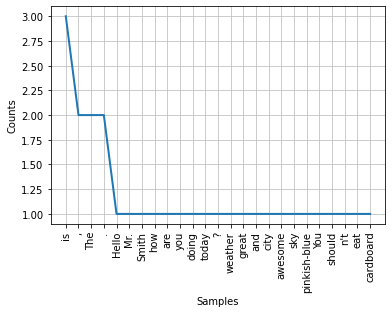

In [9]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


# Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)


{'his', 'wouldn', 'ours', 'him', "doesn't", "don't", "that'll", "you're", 'what', 'hers', 'does', 'me', 'that', 'under', 'hasn', 'how', 'its', 'wasn', 'any', 'we', 'y', 'only', 'for', 'hadn', 'through', 'who', "shouldn't", 'did', 'where', 'is', "haven't", 'these', 'your', 'didn', 'm', 'shouldn', 'aren', "should've", 'ain', 'own', 'before', 'again', 'too', 'needn', 'why', 'whom', 'd', 'there', 'same', 'very', 'be', 'at', 's', "aren't", 'no', 'they', 're', 'are', 'shan', 'she', 'haven', 've', 'yourself', 'now', 'in', 'each', 'himself', 'herself', 'up', 'just', 'mightn', 'theirs', 'but', 'nor', "mightn't", 'than', "weren't", "won't", 'them', 'couldn', 'the', 'until', 'do', 'am', 'her', 'then', 'yours', 'i', 'more', 'because', 'as', "didn't", 'our', "you'd", 'after', "mustn't", 'out', 'on', 'other', 'will', "needn't", 'an', "couldn't", 'not', "hasn't", 'should', 'myself', 'both', 'their', 'doesn', "hadn't", 'this', 'a', 'by', 'my', 'll', 'all', 'you', 'themselves', 'can', 'few', "isn't", '

## Removing Stopwords

In [16]:
tokenized_sent = tokenized_word
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)


Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


# Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

## Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [17]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


## Lemmatization

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [18]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))


Lemmatized Word: fly
Stemmed Word: fli


# POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [19]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."


In [20]:
tokens=nltk.word_tokenize(sent)
print(tokens)


['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [21]:
nltk.pos_tag(tokens)


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# Sentiment Analysis

Nowadays companies want to understand, what went wrong with their latest products? What users and the general public think about the latest feature? You can quantify such information with reasonable accuracy using sentiment analysis.

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

Human communication just not limited to words, it is more than words. Sentiments are combination words, tone, and writing style. As a data analyst, It is more important to understand our sentiments, what it really means?

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK2_y3s1ba.png)

There are mainly two approaches for performing sentiment analysis.

- Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

- Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

In this Tutorial, you will use the second approach(Machine learning based approach). This is how you learn sentiment and text classification with a single example.

# Text Classification

Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. In the next section, you will learn how you can do text classification in python.

![](https://raw.githubusercontent.com/nils-holmberg/cca-cce/main/res/img/NLTK3_zwbdgg.webp)

# Performing Sentiment Analysis using Text Classification

In [22]:
# Import pandas
import pandas as pd


## Loading Data

Till now, you have learned data pre-processing using NLTK. Now, you will learn Text Classification. You will perform Multi-Nomial Naive Bayes Classification using scikit-learn.

In the model the building part, you can use the "Sentiment Analysis of Movie, Reviews" dataset available on Kaggle. The dataset is a tab-separated file. Dataset has four columns PhraseId, SentenceId, Phrase, and Sentiment.

This data has 5 sentiment labels:

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

Here, you can build a model to classify the type of cultivar. The dataset is available on Kaggle. You can download it from the following [link](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) or google drive. 

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
df = "/content/drive/MyDrive/Colab Notebooks/sfac-py/cca-nlp-data/train.tsv"

data=pd.read_csv(df, sep='\t')


In [25]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [27]:
data.Sentiment.value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

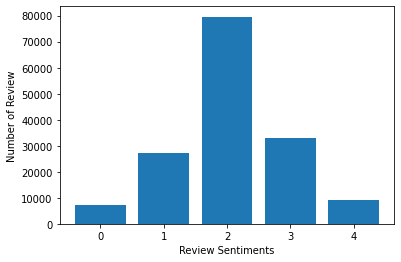

In [28]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()


## Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

Example: There are three documents:

Doc 1: I love dogs. Doc 2: I hate dogs and knitting. Doc 3: Knitting is my hobby and passion.

Now, you can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM).

In [29]:
doc1 = "I love dogs"
doc2 = "I hate dogs and knitting"
doc3 = "Knitting is my hobby and passion"


In [34]:
#!pip install textmining3
import textmining

In [36]:
# Initialize class to create term-document matrix
tdm = textmining.TermDocumentMatrix()

# Add the documents
tdm.add_doc(doc1)
tdm.add_doc(doc2)
tdm.add_doc(doc3)

# Write matrix file -- cutoff=1 means words in 1+ documents are retained
tdm.write_csv('matrix.csv', cutoff=1)

# Instead of writing the matrix, access its rows directly
for row in tdm.rows(cutoff=1):
    print(row)

['i', 'love', 'dogs', 'hate', 'and', 'knitting', 'is', 'my', 'hobby', 'passion']
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [37]:
type(tdm)

textmining.TermDocumentMatrix

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

docs = [doc1, doc2, doc3]
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   and  dogs  hate  hobby  is  knitting  love  my  passion
0    0     1     0      0   0         0     1   0        0
1    1     1     1      0   0         1     0   0        0
2    1     0     0      1   1         1     0   1        1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This matrix is using a single word. It can be a combination of two or more words, which is called a bigram or trigram model and the general approach is called the n-gram model.

You can generate document term matrix by using scikit-learn's CountVectorizer.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])


## Split train and test set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [41]:
text_counts

<156060x14988 sparse matrix of type '<class 'numpy.int64'>'
	with 598944 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)


## Model Building and Evaluation

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [43]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6049169122986885


Well, you got a classification rate of 60.49% using CountVector(or BoW), which is not considered as good accuracy. We need to improve this.

## Feature Generation using TF-IDF

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

twitter data: [link](https://github.com/tthustla/twitter_sentiment_analysis_part1)

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.
table

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])


## Split train and test set (TF-IDF)

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)


## Model Building and Evaluation (TF-IDF)

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.5865265496176684


Well, you got a classification rate of 58.65% using TF-IDF features, which is not considered as good accuracy. We need to improve the accuracy by using some other preprocessing or feature engineering. Let's suggest in comment box some approach for accuracy improvement.

# Conclusion

Congratulations, you have made it to the end of this tutorial!

In this tutorial, you have learned what Text Analytics is, NLP and text mining, basics of text analytics operations using NLTK such as Tokenization, Normalization, Stemming, Lemmatization and POS tagging. What are sentiment analysis and text classification using scikit-learn?

I look forward to hearing any feedback or questions. You can ask the question by leaving a comment, and I will try my best to answer it.

If you are interested in learning more about Python, please take DataCamp's Natural Language Processing Fundamentals in Python course.

Check out our Absolute and Weighted Frequency of Words in Text tutorial.